### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()
unique_values

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
apptype_counts = application_df.APPLICATION_TYPE.value_counts()
apptype_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

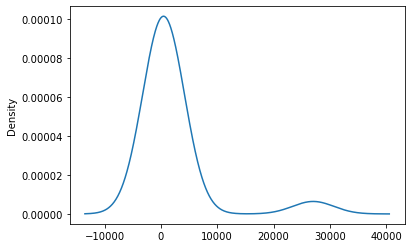

In [5]:
# Visualize the value counts of APPLICATION_TYPE
apptype_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(apptype_counts[apptype_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1580        1
C3700        1
C1245        1
C6100        1
C1370        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

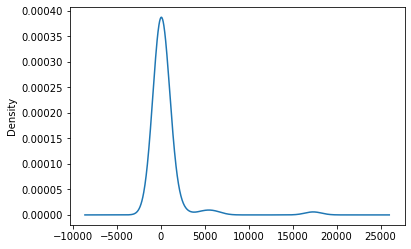

In [8]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [18]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [19]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 3:55 - loss: 3303.3042 - accuracy: 0.3125
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 16/804 [..............................] - ETA: 2s - loss: 6037.1787 - accuracy: 0.4512  
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 5089.8916 - accuracy: 0.4550
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model 

526/804 [==================>...........] - ETA: 0s - loss: 54323.0273 - accuracy: 0.4818
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 52040.3281 - accuracy: 0.4798
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 50218.5938 - accuracy: 0.4778
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoint


Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 20812.9629 - accuracy: 0.5205
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 19251.4492 - accuracy: 0.5145
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 21540.1758 - accuracy: 0.5103
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoint

787/804 [============================>.] - ETA: 0s - loss: 27375.4004 - accuracy: 0.4931
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 27055.5762 - accuracy: 0.4920
Epoch 3/100
  1/804 [..............................] - ETA: 0s - loss: 1777.3098 - accuracy: 0.4062
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 23/804 [..............................] - ETA: 2s - loss: 18784.6719 - accuracy: 0.4769
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03

503/804 [=================>............] - ETA: 0s - loss: 50702.2500 - accuracy: 0.5024
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 51078.8359 - accuracy: 0.5025
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 50231.4727 - accuracy: 0.5011
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoint

224/804 [=======>......................] - ETA: 1s - loss: 6037.8188 - accuracy: 0.5105
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 5448.1089 - accuracy: 0.5169
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 4953.2939 - accuracy: 0.5181
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\w

764/804 [===========================>..] - ETA: 0s - loss: 29999.3750 - accuracy: 0.5153
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
789/804 [============================>.] - ETA: 0s - loss: 29058.1523 - accuracy: 0.5133
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 28535.9434 - accuracy: 0.5126
Epoch 5/100
  1/804 [..............................] - ETA: 0s - loss: 20.4964 - accuracy: 0.4062
Epoch 00005: saving model to checkpoints\weights.05.hdf5
  5/804 [..............................] - ETA: 13s - loss: 199.3885 - accuracy: 0.4938
Epoch 00005: saving mode


Epoch 00005: saving model to checkpoints\weights.05.hdf5
490/804 [=================>............] - ETA: 0s - loss: 7376.1382 - accuracy: 0.5057
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 7338.6309 - accuracy: 0.5027
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 10157.9648 - accuracy: 0.5012
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\

211/804 [======>.......................] - ETA: 1s - loss: 9394.8398 - accuracy: 0.5193
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 9078.8652 - accuracy: 0.5134
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 8845.3486 - accuracy: 0.5090
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\w

751/804 [===========================>..] - ETA: 0s - loss: 17068.7266 - accuracy: 0.5020
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 16574.3359 - accuracy: 0.5006
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 16008.9854 - accuracy: 0.5030
Epoch 7/100
  1/804 [..............................] - ETA: 0s - loss: 104.5282 - accuracy: 0.4688
Epoch 00007: saving model to checkpoints\weights.07.


Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
492/804 [=================>............] - ETA: 0s - loss: 2062.3618 - accuracy: 0.5242
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 1965.0248 - accuracy: 0.5273
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 1898.5967 - accuracy: 0.5291
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\w

203/804 [======>.......................] - ETA: 1s - loss: 49797.5625 - accuracy: 0.5011
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
228/804 [=======>......................] - ETA: 1s - loss: 44369.5352 - accuracy: 0.5075
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 40058.2617 - accuracy: 0.5077
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoint


Epoch 00008: saving model to checkpoints\weights.08.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 22167.7266 - accuracy: 0.4926
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
778/804 [============================>.] - ETA: 0s - loss: 21553.5273 - accuracy: 0.4918
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 20888.3594 - accuracy: 0.4907
Epoch 9/100
  1/804 [..............................] - ETA: 0s - loss: 391.8924 - accuracy: 0

479/804 [================>.............] - ETA: 0s - loss: 3806.8718 - accuracy: 0.5001
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
504/804 [=================>............] - ETA: 0s - loss: 3731.2925 - accuracy: 0.5007
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 4035.8640 - accuracy: 0.4995
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\w


Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 836.9174 - accuracy: 0.5028
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 760.0264 - accuracy: 0.5052
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 695.2203 - accuracy: 0.5083
Epoch 00010: saving model to checkpoints\weig


Epoch 00010: saving model to checkpoints\weights.10.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 7035.2334 - accuracy: 0.5111
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
790/804 [============================>.] - ETA: 0s - loss: 6812.9888 - accuracy: 0.5112
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 6695.4683 - accuracy: 0.5122
Epoch 11/100
  1/804 [..............................] - ETA: 1s - loss: 4.4589 - accuracy: 0.5000
Epoch 00011: saving model to checkpoints\weights.11.hdf5
  6/804 [..............................] - ETA: 9s - loss


Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
501/804 [=================>............] - ETA: 0s - loss: 7366.8271 - accuracy: 0.5105
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 7069.6885 - accuracy: 0.5127
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 6774.8027 - a


Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 1397.6866 - accuracy: 0.5265
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 1267.5045 - accuracy: 0.5269
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
272/804 [=========>....................] - ETA: 1s - loss: 1166.2258 - a


Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 2090.1648 - accuracy: 0.5417
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
787/804 [============================>.] - ETA: 0s - loss: 2341.5752 - accuracy: 0.5433
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 2305.8547 - accuracy: 0.5441
Epoch 13/100
  1/804 [..............................] - ETA: 0s - loss: 1836.1013 - accuracy: 0.5000
Epoch 00013: saving model to checkpoints\weights.13.h

473/804 [================>.............] - ETA: 0s - loss: 5266.8262 - accuracy: 0.5136
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
493/804 [=================>............] - ETA: 0s - loss: 5066.5015 - accuracy: 0.5112
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 4880.0835 - accuracy: 0.5073
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\w

194/804 [======>.......................] - ETA: 1s - loss: 2920.8560 - accuracy: 0.5300
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 2615.4658 - accuracy: 0.5332
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 2501.7595 - accuracy: 0.5363
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 2308.0544 - accuracy: 0.5370
Epoch 00014: 


Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 3843.3643 - accuracy: 0.5121
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 3721.7542 - accuracy: 0.5121
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
789/804 [============================>.] - ETA: 0s - loss: 3615.2512 - accuracy: 0.5140
Epoch 00014: saving model to checkpoints\w


Epoch 00015: saving model to checkpoints\weights.15.hdf5
470/804 [================>.............] - ETA: 0s - loss: 3616.5696 - accuracy: 0.5170
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
495/804 [=================>............] - ETA: 0s - loss: 3459.2598 - accuracy: 0.5145
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 3307.3481 - accuracy: 0.5168
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\w


Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
196/804 [======>.......................] - ETA: 1s - loss: 2896.9451 - accuracy: 0.5217
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 2605.6038 - accuracy: 0.5127
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
246/804 [========>.....................] - ETA: 1s - loss: 2402.7173 - accuracy: 0.5091
Epoch 00016: saving model to checkpoints\w

721/804 [=========================>....] - ETA: 0s - loss: 1317.2579 - accuracy: 0.5187
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 1274.5480 - accuracy: 0.5192
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 1236.1577 - accuracy: 0.5199
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\w

447/804 [===============>..............] - ETA: 0s - loss: 7477.9565 - accuracy: 0.5178
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
472/804 [================>.............] - ETA: 0s - loss: 7108.1387 - accuracy: 0.5156
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
497/804 [=================>............] - ETA: 0s - loss: 6804.7056 - accuracy: 0.5192
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\w

173/804 [=====>........................] - ETA: 1s - loss: 144.4051 - accuracy: 0.5385
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 209.3770 - accuracy: 0.5368
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 190.3742 - accuracy: 0.5373
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weig

708/804 [=========================>....] - ETA: 0s - loss: 1122.7960 - accuracy: 0.5233
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 1106.7937 - accuracy: 0.5226
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 1071.6696 - accuracy: 0.5240
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\w


Epoch 00019: saving model to checkpoints\weights.19.hdf5
434/804 [===============>..............] - ETA: 0s - loss: 1308.6716 - accuracy: 0.5076
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
459/804 [================>.............] - ETA: 0s - loss: 1264.6799 - accuracy: 0.5059
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
484/804 [=================>............] - ETA: 0s - loss: 1334.3973 - accuracy: 0.5028
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\w


Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 1761.9186 - accuracy: 0.5074
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
185/804 [=====>........................] - ETA: 1s - loss: 1531.7710 - accuracy: 0.5133
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
210/804 [======>.......................] - ETA: 1s - loss: 1370.1603 - accuracy: 0.5152
Epoch 00020: saving model to checkpoints\w

700/804 [=========================>....] - ETA: 0s - loss: 1196.3472 - accuracy: 0.5362
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 1180.2555 - accuracy: 0.5356
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 1141.1090 - accuracy: 0.5369
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
760/804 [===========================>..] - 


Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
436/804 [===============>..............] - ETA: 0s - loss: 1450.4299 - accuracy: 0.5065
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
461/804 [================>.............] - ETA: 0s - loss: 1494.1351 - accuracy: 0.5070
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
486/804 [=================>............] - ETA: 0s - loss: 1682.7181 - accuracy: 0.5060
Epoch 00021: saving model to checkpoints\w

162/804 [=====>........................] - ETA: 1s - loss: 277.9521 - accuracy: 0.5548
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
187/804 [=====>........................] - ETA: 1s - loss: 272.3793 - accuracy: 0.5558
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 244.3551 - accuracy: 0.5665
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weig


Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 305.0783 - accuracy: 0.5248
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 298.2654 - accuracy: 0.5254
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 288.8940 - accuracy: 0.5284
Epoch 00022: saving model to checkpoints\weig


Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
438/804 [===============>..............] - ETA: 0s - loss: 629.4167 - accuracy: 0.5265
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
463/804 [================>.............] - ETA: 0s - loss: 605.5200 - accuracy: 0.5237
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
488/804 [=================>............] - ETA: 0s - loss: 602.3232 - accuracy: 0.5211
Epoch 00023: saving model to checkpoints\weig


Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 593.4522 - accuracy: 0.5124
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 524.0845 - accuracy: 0.5085
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 707.8447 - accu


Epoch 00024: saving model to checkpoints\weights.24.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 695.3776 - accuracy: 0.4995
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 690.9832 - accuracy: 0.5006
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 668.2500 - accuracy: 0.5011
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weig


Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
440/804 [===============>..............] - ETA: 0s - loss: 0.7367 - accuracy: 0.5338
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
465/804 [================>.............] - ETA: 0s - loss: 0.7366 - accuracy: 0.5320
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
490/804 [=================>............] - ETA: 0s - loss: 0.7349 - accuracy: 0.5332
Epoch 00025: saving model to checkpoints\weights.25


Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
176/804 [=====>........................] - ETA: 1s - loss: 0.6975 - accuracy: 0.5403
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.6979 - accuracy: 0.5387
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
226/804 [=======>......................] - ETA: 1s - loss: 0.6992 - accuracy: 0.5344
Epoch 00026: saving model to checkpoints\weights.26

706/804 [=========================>....] - ETA: 0s - loss: 0.6961 - accuracy: 0.5331
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6960 - accuracy: 0.5332
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6958 - accuracy: 0.5336
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26


Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
457/804 [================>.............] - ETA: 0s - loss: 0.6919 - accuracy: 0.5306
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
482/804 [================>.............] - ETA: 0s - loss: 0.6920 - accuracy: 0.5298
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
507/804 [=================>............] - ETA: 0s - loss: 0.6920 - accuracy: 

178/804 [=====>........................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5362
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28

718/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
778/804 [============================>.] - ETA: 0s -

444/804 [===============>..............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5343
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
469/804 [================>.............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
494/804 [=================>............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29


Epoch 00030: saving model to checkpoints\weights.30.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5304
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
205/804 [======>.......................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
230/804 [=======>......................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30

715/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30

441/804 [===============>..............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
466/804 [================>.............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31


Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5381
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5366
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5351
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32

697/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32

422/804 [==============>...............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
443/804 [===============>..............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5353
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
466/804 [================>.............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33

148/804 [====>.........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5372
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
169/804 [=====>........................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5361
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
194/804 [======>.......................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5393
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34


Epoch 00034: saving model to checkpoints\weights.34.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34

395/804 [=============>................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5270
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
418/804 [==============>...............] - ETA: 0s - loss: 0.6917 - accuracy: 0.5273
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
440/804 [===============>..............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5285
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35

126/804 [===>..........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5397
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5415
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
183/804 [=====>........................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5408
Epoch 00036: saving model


Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00036: saving model to checkpoints\weights.36

387/804 [=============>................] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
412/804 [==============>...............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
436/804 [===============>..............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37


Epoch 00038: saving model to checkpoints\weights.38.hdf5
116/804 [===>..........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5388
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5408
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5417
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38


Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 00038: saving model to checkpoints\weights.38

372/804 [============>.................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
418/804 [==============>...............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5298
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39

 90/804 [==>...........................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5410
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
114/804 [===>..........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5370
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
135/804 [====>.........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5384
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40


Epoch 00040: saving model to checkpoints\weights.40.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5291
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5286
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5287
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40

346/804 [===========>..................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41


Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
 77/804 [=>............................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
 97/804 [==>...........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5358
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5386
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42

600/804 [=====================>........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5352
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5352
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5355
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42


Epoch 00043: saving model to checkpoints\weights.43.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5334
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43

 44/804 [>.............................] - ETA: 1s - loss: 0.6939 - accuracy: 0.5099
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
 68/804 [=>............................] - ETA: 1s - loss: 0.6933 - accuracy: 0.5152
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
 89/804 [==>...........................] - ETA: 1s - loss: 0.6926 - accuracy: 0.5204
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44

577/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5296
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44


Epoch 00045: saving model to checkpoints\weights.45.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5293
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5296
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5288
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 00045: saving model

 24/804 [..............................] - ETA: 1s - loss: 0.6845 - accuracy: 0.5781
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
 46/804 [>.............................] - ETA: 1s - loss: 0.6880 - accuracy: 0.5543
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
 71/804 [=>............................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46


Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334
Epoch 00046: saving model to checkpoints\weights.46


Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47

  3/804 [..............................] - ETA: 20s - loss: 0.6982 - accuracy: 0.4792
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
 26/804 [..............................] - ETA: 3s - loss: 0.6931 - accuracy: 0.5168 
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
 48/804 [>.............................] - ETA: 2s - loss: 0.6937 - accuracy: 0.5124
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.


Epoch 00048: saving model to checkpoints\weights.48.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48

264/804 [========>.....................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49


Epoch 00049: saving model to checkpoints\weights.49.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00049: saving model to checkpoints\weights.49.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 50/100
  1/804 [..............................] - ETA: 0s - loss: 0.6738 - accuracy: 0.6562
Epoch 00050: saving model to checkpoints\weights.50.hdf5
  5/804 [..............................] - ETA: 11s - loss: 0.6825 - accuracy: 0.5938
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5275 
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoi

515/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5294
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5295
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5298
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50

246/804 [========>.....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5347
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51


Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 52/100
  1/804 [..............................] - ETA: 0s - loss: 0.6868 - accuracy: 0.5625
Epoch 00052: saving model to checkpoints\weights.52.hdf5
  4/804 [..............................] - ETA: 13s - loss: 0.6924 - accuracy: 0.5234
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5370 
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch


Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.6912 - accuracy: 

233/804 [=======>......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5291
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5306
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53

773/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 00053: saving model to checkpoints\weights.53.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 54/100
  1/804 [..............................] - ETA: 0s - loss: 0.7003 - accuracy: 0.4688
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6920 

494/804 [=================>............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5358
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
516/804 [==================>...........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5354
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5352
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54

210/804 [======>.......................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5351
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
233/804 [=======>......................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5362
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55

749/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
804/804 [==============================] - 2s 2ms/st


Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
501/804 [=================>............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 00056: saving model to checkpoints\weights.56

189/804 [======>.......................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5281
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57


Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 

458/804 [================>.............] - ETA: 0s - loss: 0.6906 - accuracy: 0.5360
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5354
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
502/804 [=================>............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5349
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58


Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
189/804 [======>.......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5284
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
210/804 [======>.......................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5298
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59

721/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59


Epoch 00060: saving model to checkpoints\weights.60.hdf5
449/804 [===============>..............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
470/804 [================>.............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5353
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
492/804 [=================>............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5353
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60


Epoch 00061: saving model to checkpoints\weights.61.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5353
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61

706/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61


Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
438/804 [===============>..............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5284
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5293
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
482/804 [================>.............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5297
Epoch 00062: saving model to checkpoints\weights.62

161/804 [=====>........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5285
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
183/804 [=====>........................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
208/804 [======>.......................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5347
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63

693/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63


Epoch 00064: saving model to checkpoints\weights.64.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5300
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
444/804 [===============>..............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5308
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
466/804 [================>.............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5308
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64


Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
145/804 [====>.........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
170/804 [=====>........................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65

672/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5304
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65


Epoch 00066: saving model to checkpoints\weights.66.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
426/804 [==============>...............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
449/804 [===============>..............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66

117/804 [===>..........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5406
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5369
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
151/804 [====>.........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
172/804 [=====>........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5351
Epoch 00067: saving model

652/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
712/804 [=========================>....] - ETA: 0s -

373/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5347
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
422/804 [==============>...............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5347
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68


Epoch 00069: saving model to checkpoints\weights.69.hdf5
 94/804 [==>...........................] - ETA: 2s - loss: 0.6926 - accuracy: 0.5180
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5234
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
142/804 [====>.........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5275
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69

621/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5301
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5294
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69


Epoch 00070: saving model to checkpoints\weights.70.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5274
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5277
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5286
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70


Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5300
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5351
Epoch 00071: saving model to checkpoints\weights.71


Epoch 00071: saving model to checkpoints\weights.71.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5283
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.6917 - accuracy: 0.5277
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5286
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71

326/804 [===========>..................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5287
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5283
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5278
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72


Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 55/804 [=>............................] - ETA: 2s - loss: 0.6934 - accuracy: 0.5176
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.6929 - accuracy: 0.5204
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5235
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73

583/804 [====================>.........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73

308/804 [==========>...................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74

 34/804 [>.............................] - ETA: 2s - loss: 0.6934 - accuracy: 0.5147
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
 55/804 [=>............................] - ETA: 2s - loss: 0.6930 - accuracy: 0.5170
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75


Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75


Epoch 00076: saving model to checkpoints\weights.76.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5394
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5379
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5387
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76


Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
 22/804 [..............................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5284
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
 47/804 [>.............................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5273
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
 72/804 [=>............................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5239
Epoch 00077: saving model to checkpoints\weights.77

557/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77


Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5347
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78

  1/804 [..............................] - ETA: 0s - loss: 0.7071 - accuracy: 0.3750
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6969 - accuracy: 0.4757
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.6930 - accuracy: 0.5146
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
 54/804 [=>............................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5214
Epoch 00079: saving model

534/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5348
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79


Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5281
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
305/804 [==========>...................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5286
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80


Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00080: saving model to checkpoints\weights.80.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 81/100
  1/804 [..............................] - ETA: 0s - loss: 0.6850 - accuracy: 0.5938
Epoch 00081: saving model to checkpoints\weights.81.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.6881 - accuracy: 0.5625
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
 26/804 [..............................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5337
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoint

509/804 [=================>............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81

235/804 [=======>......................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82

762/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 83/100
  1/804 [..............................] - ETA: 1s - loss: 0.6809 - accuracy: 0.6250
Epoch 00083: saving model to checkpoints\weights.83.hdf5
  4/804 [..............................] - ETA: 13s - loss: 0.6895 - accuracy: 0.5469
Epoch 00083: saving model to checkpoin


Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 

199/804 [======>.......................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5404
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5413
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5390
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84

743/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84


Epoch 00085: saving model to checkpoints\weights.85.hdf5
469/804 [================>.............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
490/804 [=================>............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5344
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85


Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
191/804 [======>.......................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5375
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
216/804 [=======>......................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5333
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5345
Epoch 00086: saving model to checkpoints\weights.86

721/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86


Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
452/804 [===============>..............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5288
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.6917 - accuracy: 0.5278
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87

163/804 [=====>........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5289
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
183/804 [=====>........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5282
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
203/804 [======>.......................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
226/804 [=======>......................] - ETA: 1s -


Epoch 00088: saving model to checkpoints\weights.88.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88

429/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
451/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89


Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
165/804 [=====>........................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5420
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
189/804 [======>.......................] - ETA: 1s - loss: 0.6893 - accuracy: 0.5441
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
210/804 [======>.......................] - ETA: 1s - loss: 0.6894 - accuracy: 0.5436
Epoch 00090: saving model to checkpoints\weights.90


Epoch 00090: saving model to checkpoints\weights.90.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90


Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
429/804 [===============>..............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
451/804 [===============>..............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91

145/804 [====>.........................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
166/804 [=====>........................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5296
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
187/804 [=====>........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5286
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92

677/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92

399/804 [=============>................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5352
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.6906 - accuracy: 0.5361
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
448/804 [===============>..............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5352
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93

124/804 [===>..........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5224
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5283
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
169/804 [=====>........................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5246
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94

659/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94


Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
435/804 [===============>..............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 00095: saving model to checkpoints\weights.95

101/804 [==>...........................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5300
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
125/804 [===>..........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5375
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
146/804 [====>.........................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5379
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96


Epoch 00096: saving model to checkpoints\weights.96.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96

355/804 [============>.................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5298
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5286
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97

 68/804 [=>............................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
 93/804 [==>...........................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5423
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
115/804 [===>..........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5378
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98

618/804 [======================>.......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5352
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5359
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5359
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98


Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5245
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5252
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5266
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99

 60/804 [=>............................] - ETA: 2s - loss: 0.6893 - accuracy: 0.5453
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
 80/804 [=>............................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5430
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
104/804 [==>...........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5364
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoint

590/804 [=====================>........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5272
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5270
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.6917 - accuracy: 0.5271
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5283
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: s

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.9959 - accuracy: 0.5334
Loss: 0.9959415793418884, Accuracy: 0.5334110856056213


In [22]:
# Export model to HDF5 file
nn.save("AlphabetSoupCharity.h5")